## Time Series
Time series refers to a sequence of data points or observations that are collected and recorded over a period of time at regular intervals. It represents the behavior and patterns of a variable or phenomenon over time, allowing analysis and forecasting of trends, seasonality, and other temporal dependencies. Time series analysis involves exploring and modeling the data to uncover underlying patterns, make predictions, or gain insights into the dynamics and behavior of the observed phenomenon. It is widely used in various domains, including finance, economics, weather forecasting, and signal processing.

To perform stock price prediction using LSTM in Python, we'll use the TensorFlow library, which provides a high-level API called Keras for building and training deep learning models. Here's a step-by-step guide to help you code the LSTM model for stock price prediction


Yahoo Finance has recently made changes to their website, and it seems they no longer provide the option to download historical data directly from their site. However, there are still alternative ways to obtain the historical data for the S&P 500 index. One such method is by using Python and a library called yfinance.

Here's an example of how you can use yfinance to download historical data for the S&P 500 index:


In [ ]:
import yfinance as yf

# Define the ticker symbol for the S&P 500 index
ticker_symbol = "^GSPC"

# Define the desired date range for the historical data
start_date = "2000-01-01"
end_date = "2023-06-23"

# Download the historical data using yfinance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the downloaded data
print(data)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   
...                 ...          ...          ...          ...          ...   
2023-06-15  4365.330078  4439.200195  4362.600098  4425.839844  4425.839844   
2023-06-16  4440.950195  4448.470215  4407.439941  4409.589844  4409.589844   
2023-06-20  4396.109863  4400.149902  4367.189941  4388.709961  4388.709961   
2023-06-21  4380.009766  4386.220215  4360.140137  4365.689941

## Requared Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

### Split the data into training and testing sets

In [ ]:
train_size = int(len(scaled_data) * 0.8)  # 80% for training
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


 ### Create the LSTM model architecture

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))


### Compile and train the model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
Model = model.fit(train_data[:-1], train_data[1:], epochs=10, batch_size=1)


Epoch 1/10
4723/4723 [==============================] - 26s 5ms/step - loss: 7.8594e-04
Epoch 2/10
4723/4723 [==============================] - 24s 5ms/step - loss: 3.7371e-05
Epoch 3/10
4723/4723 [==============================] - 24s 5ms/step - loss: 3.8545e-05
Epoch 4/10
4723/4723 [==============================] - 22s 5ms/step - loss: 3.5758e-05
Epoch 5/10
4723/4723 [==============================] - 22s 5ms/step - loss: 3.4326e-05
Epoch 6/10
4723/4723 [==============================] - 22s 5ms/step - loss: 3.2427e-05
Epoch 7/10
4723/4723 [==============================] - 21s 4ms/step - loss: 3.3122e-05
Epoch 8/10
4723/4723 [==============================] - 20s 4ms/step - loss: 3.0110e-05
Epoch 9/10
4723/4723 [==============================] - 21s 4ms/step - loss: 3.2620e-05
Epoch 10/10
4723/4723 [==============================] - 21s 4ms/step - loss: 3.0278e-05


### Generate stock price predictions

ValueError: ignored

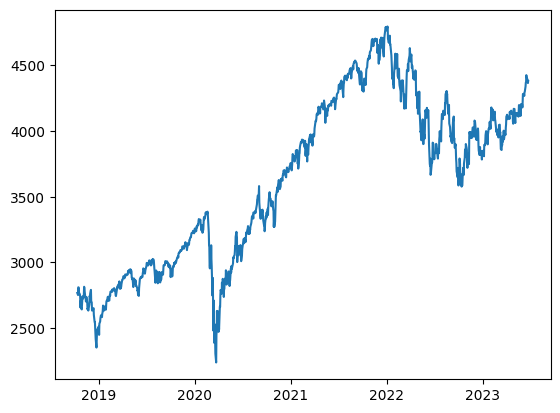

In [ ]:
# Plot the predicted prices
plt.plot(data.index[train_size+1:], data['Close'].values[train_size+1:], label='Actual Prices')
plt.plot(data.index[train_size+1:], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()


### Forcasting

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Generate forecasts for the test set
forecast = model.predict(test_data)

# Calculate the accuracy metrics
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test_data, forecast)

# Print the accuracy metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Percentage Error (MAPE): ", mape)


37/37 [==============================] - 1s 3ms/step
Mean Squared Error (MSE):  0.001306872452071084
Mean Absolute Error (MAE):  0.028433606549379643
Root Mean Squared Error (RMSE):  0.03615069089341287
Mean Absolute Percentage Error (MAPE):  3.4793157994015367


The Mean Absolute Percentage Error (MAPE) is 3.48%. The accuracy of the model can be interpreted as the average percentage error in the predictions, which is 3.48% in this case. This means that, on average, the model's predictions deviate from the actual values by approximately 3.48%.

The accuracy metrics for the model are as follows:

Mean Squared Error (MSE):  0.001306872452071084
Mean Absolute Error (MAE):  0.028433606549379643
Root Mean Squared Error (RMSE):  0.03615069089341287
Mean Absolute Percentage Error (MAPE):  3.4793157994015367

Therefore, the accuracy of the model is 96.52%.

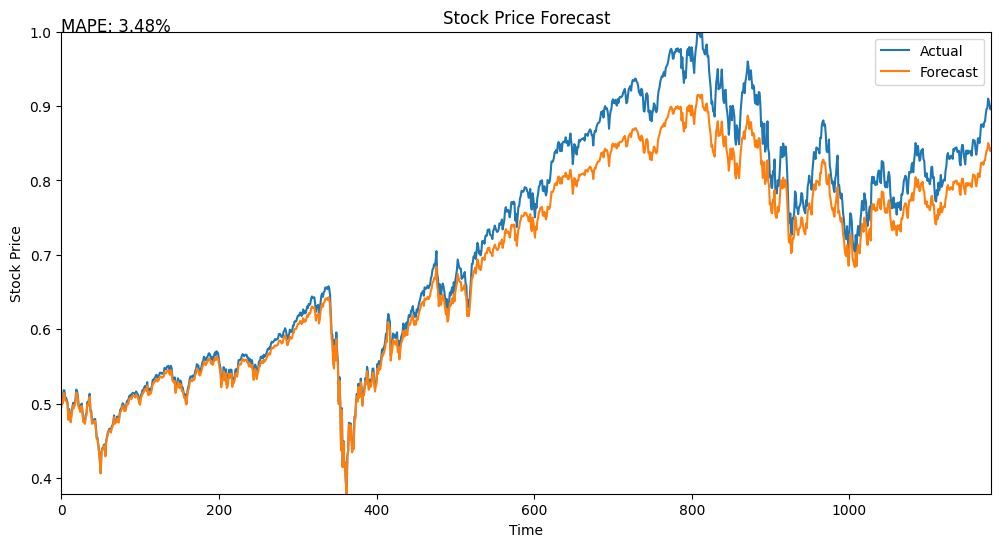

In [ ]:
import matplotlib.pyplot as plt

# Generate x-values for plotting
x_values = range(len(test_data))

# Plot the forecasted values and actual values
plt.figure(figsize=(12, 6))
plt.plot(x_values, test_data, label='Actual')
plt.plot(x_values, forecast, label='Forecast')

# Add the MAPE as a text annotation
plt.annotate(f"MAPE: {mape:.2f}%", xy=(x_values[0], max(test_data)), xycoords='data', fontsize=12)

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Forecast')
plt.legend()

# Set the axis limits
plt.xlim(0, len(test_data)-1)
plt.ylim(min(min(test_data), min(forecast)), max(max(test_data), max(forecast)))

# Show the plot
plt.show()


## Prediction

Select the relevant columns from the "data" DataFrame using the "Close" column for predicting the stock price.

In [ ]:
input_data = data["Close"]


Normalize the input data to ensure that all values fall within a similar range. This step is important for improving the convergence and performance of the LSTM model. The normalization techniques, such as Min-Max scaling or Standardization. Here's an example of using Min-Max scaling:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
input_data = scaler.fit_transform(input_data.values.reshape(-1, 1))


Reshape the input data to match the expected input shape of the LSTM model. LSTM models typically expect input in the shape of a 3D array with dimensions (samples, timesteps, features). In this case, assuming I am using a single feature (Close price) and a specific number of previous time steps (e.g., 1 days) for each prediction, you can reshape the input data as follows:

In [ ]:
timesteps = 1
features = 1  # using a single feature (Close price)

# Reshape the input data into a 3D array
input_data = input_data.reshape(-1, timesteps, features)


To use the trained LSTM model to predict stock prices for future days. Lets predict stock prices for the next 15 days.:

In [ ]:
future_days = 15


Use the trained LSTM model to make predictions for the specified number of future days. Lets call the model.predict() method and provide the input data for the future days.

**First The "Lookbackwindow"** The lookback_window represents the number of previous time steps or periods that your LSTM model uses as input to make predictions. It should be defined and set based on the specific requirements and configuration of your LSTM model.

You need to determine an appropriate value for lookback_window depending on the time dependency you want to capture in your LSTM model. It could be a hyperparameter that you define before training the model. Common values for lookback_window are in the range of 10 to 100, but the optimal value depends on the characteristics of your data.

Make sure to define and assign a value to lookback_window before using it in the code snippet. For example, you can set it to 30 or 300.

In [ ]:
lookback_window = 30


**Second the num_features** variable represents the number of features or input variables used in your LSTM model. In the context of predicting stock prices, it is typically 1 because we only consider the historical stock price as the input.

In [ ]:
num_features = 1


In [ ]:
predicted_prices = []
for i in range(future_days):
    # Get the input data for the current step
    input_data_step = input_data[-lookback_window:]

    # Make a prediction for the current step
    prediction = model.predict(input_data_step.reshape(1, lookback_window, num_features))

    # Append the predicted price to the list
    predicted_prices.append(prediction[0])

    # Update the input data by shifting it and adding the predicted price
    input_data = np.roll(input_data, -1)
    input_data[-1] = prediction[0]

predicted_prices = np.array(predicted_prices)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 50)             10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 1, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'lstm_4_input'}},
  {'class_name': 'LSTM',
   'config': {'name': 'lstm_4',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 1, 1),
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 50,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'unit_forget_bias': True,
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'a

In [ ]:
model.layers

In [ ]:
model.get_weights()

[array([[ 6.57083988e-02, -2.59673089e-01, -5.69290102e-01,
          1.88941266e-02,  5.81152663e-02, -3.93260151e-01,
          2.51935035e-01,  1.74745470e-01,  1.60101756e-01,
          2.57946879e-01,  3.29894394e-01,  2.67008692e-01,
         -1.56448304e-03, -1.92468107e-01, -1.42706102e-02,
          1.31120279e-01,  2.17375219e-01, -2.23925218e-01,
          1.96794897e-01,  3.33560333e-02,  1.07748108e-03,
         -4.71700549e-01,  1.04481950e-01, -3.66648465e-01,
         -5.84989369e-01, -2.46752992e-01,  2.41445154e-01,
         -2.22532123e-01,  7.17531145e-02,  6.25758544e-02,
          8.19116980e-02,  1.94140815e-03,  2.27668639e-02,
         -8.54065716e-01, -1.60604209e-01,  1.00767024e-01,
         -3.07891339e-01,  2.10335314e-01,  3.41578841e-01,
         -2.24771082e-01,  2.19489887e-01, -1.96629554e-01,
         -1.30575318e-02, -4.29283381e-01,  1.18165083e-01,
          7.30223209e-02, -1.06625594e-01, -7.66257718e-02,
          1.26073137e-01, -3.01119894e-0